## Using networkx

For this network you should execute the first cell before going on to explore the
others.  Uncomment out `%matplotlib inline` if you want all your graphs to appear in the notebook and not in a separate window.  If you choose to have them in a separate window, be aware that if didn't start the notebook with the `--pylab` flag, you will have to execute `plt.show()` to get the graphs to appear on your screen, even after having given a `draw` command.

Some of the graph used in this notebook include: [homer.gml, ](http://gawron.sdsu.edu/python_for_ss/course_core/assignments/homer.gml)
[anna.gml, ](http://gawron.sdsu.edu/python_for_ss/course_core/assignments/anna.gml)
[lesmiserables.gml, ](http://gawron.sdsu.edu/python_for_ss/course_core/assignments/lesmiserables.gml)
[polblogs.gml, ](http://gawron.sdsu.edu/python_for_ss/course_core/assignments/polblogs.gml) and
[an anonymized ego network. ](http://gawron.sdsu.edu/python_for_ss/course_core/assignments/personal_ego_network_anon.gml) 

All of these can be loaded into Python using the `url_fetch_network_graph` function defined in this notebook together with the urls linked to in the previous paragraph (look at the raw markup by double-clicking on this cell).

```
url22 = 'http://gawron.sdsu.edu/python_for_ss/course_core/assignments/homer.gml'
hg = url_fetch_networkx_graph (url22)
```

After executing this code `hg` is a networkx graph instance showing the connectedness of the characters in Homer (connected means occurring in the same scene).  For those interested in network projects, have a look at [Mark Newman's networks page](http://www-personal.umich.edu/~mejn/netdata/) for mre examples.

In [1]:
#%matplotlib inline
import networkx as nx
import matplotlib
import matplotlib.pyplot as plt

In [2]:
nx.__version__

'2.5'

If you want to have your graphs appear in the matplotlib graph GUI,
then comment
out the matplotlib inline command above and start ipython notebook
up with the pylab flag.  If you do that, 
then they won't appear inline as they do in the distributed version
of the notebook.  If you have a Mac, then in the latest version
of matplotlib, you also need to uncomment out the code in the following cell and execute it.  Non Mac users should leave this commented out.

Let's read in the karate network from

> Zachary, W. W. 1977. "An information flow model for conflict and fission in small groups." Journal of anthropological research, 452-473.

We'll draw it with a  circular layout, and save the results in the image file
*networkx_circular_karate.png*.  We'll be reading in the builtin networkx version of the karate graph, rather than the one distributed in the gml file above.  The only difference is that the networkx version has node attributes identifying what faction each 
member belongs to.  That will be important in drawing an informative graph.

In [3]:
kn = nx.karate_club_graph()


For drawing, we'll try a force spring layout algorithm.

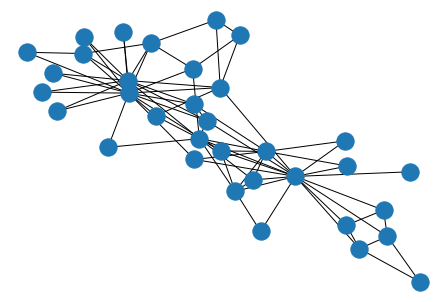

In [4]:
nx.draw_spring(kn)
# A different layout
#nx.draw_circular(kn)
# The default drawing program.
#nx.draw_networkx(kn)
# Saving the figure to a file (works only after drawing it)
plt.savefig('networkx_spring_karate.png')

You can think of a graph as a kind of very augmented dictionary.  Used as a dictionary it takes nodes as keys and the value for a node `n` is the neighbors of `n`, stored in the form of a dictionary.

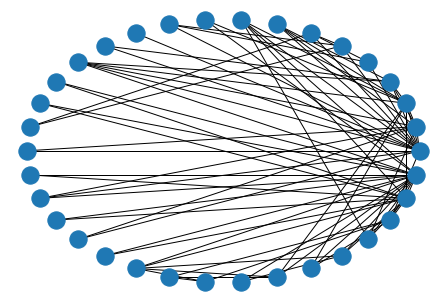

In [5]:
nx.draw_circular(kn)
plt.savefig('networkx_circular_karate.png')

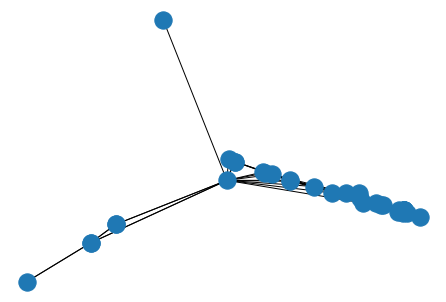

In [6]:
nx.draw_spectral(kn)
plt.savefig('networkx_spectral_karate.png')

In [6]:
kn[0]

AtlasView({1: {}, 2: {}, 3: {}, 4: {}, 5: {}, 6: {}, 7: {}, 8: {}, 10: {}, 11: {}, 12: {}, 13: {}, 17: {}, 19: {}, 21: {}, 31: {}})

In [7]:
edge01_dict = kn[0][1]
edge01_dict

{}

In [8]:
edge01_dict['color'] = 'red'

The neighbors of `0` are the keys of the dictionary `kn[0]`.  You'll notice that the values in `kn[0]` are themselves dictionaries. So we have the graph `kn` viewed as a dictionary that in turn has dictionaries as values. Now all those dictionaries are empty.  This is because as yet we have no attributes associated with any edge.  But suppose we wanted to assign the color red to the edge from 0 to 1.  Then we could do:

In [9]:
kn[0]

AtlasView({1: {'color': 'red'}, 2: {}, 3: {}, 4: {}, 5: {}, 6: {}, 7: {}, 8: {}, 10: {}, 11: {}, 12: {}, 13: {}, 17: {}, 19: {}, 21: {}, 31: {}})

A `networkx` graph has a second dictionary storing node attributes, and in this
case there is a node attribute that was defined when we loaded the graph.

## Node data

As we said above, the reason for loading up the networkx definition of the karate club graph was that it contained information about the faction of each node, information taken from Zachary's original paper.  This is stored as a **node attribute**.  Most interesting network applications will involve doing some computing with node attributes.  In `networkx`, node attributes are stored in a dictionary which is an attrribute of the graph:

In [10]:
kn.nodes[0]

{'club': 'Mr. Hi'}

Nodes can attributes too, which is fortunate because many different kinds of network analysis, esepcially dynamic network analysis, will depend on attributes we have associated with each node.  The attributes of a node are stored
in the graphs `node` dictionary.

In [11]:
kn.nodes[27]

{'club': 'Officer'}

Distinct from `node`, there is a `nodes` attribute that is a listlike container 
for all the nodes.

In [12]:
kn.nodes

NodeView((0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33))

This `NodeView` is a sequence, and can be indexed like a list:

In [13]:
kn.nodes[3]

{'club': 'Mr. Hi'}

It can be iterated through like any container.

In [14]:
[kn.nodes[n]['club'] for n in kn.nodes]

['Mr. Hi',
 'Mr. Hi',
 'Mr. Hi',
 'Mr. Hi',
 'Mr. Hi',
 'Mr. Hi',
 'Mr. Hi',
 'Mr. Hi',
 'Mr. Hi',
 'Officer',
 'Mr. Hi',
 'Mr. Hi',
 'Mr. Hi',
 'Mr. Hi',
 'Officer',
 'Officer',
 'Mr. Hi',
 'Mr. Hi',
 'Officer',
 'Mr. Hi',
 'Officer',
 'Mr. Hi',
 'Officer',
 'Officer',
 'Officer',
 'Officer',
 'Officer',
 'Officer',
 'Officer',
 'Officer',
 'Officer',
 'Officer',
 'Officer',
 'Officer']

**Write code that costructs the set of of clubs without constructing the club list for all the members.**

In [15]:
set(kn.nodes[n]['club'] for n in kn.nodes)

{'Mr. Hi', 'Officer'}

What you can do with nodes often has an analogue with edges, and vice versa.  So
there is an `edges` attribute that produce a similair list like container for edges,
providing an easy way to iterate throught the dges of a graph.

In [16]:
kn.edges()

EdgeView([(0, 1), (0, 2), (0, 3), (0, 4), (0, 5), (0, 6), (0, 7), (0, 8), (0, 10), (0, 11), (0, 12), (0, 13), (0, 17), (0, 19), (0, 21), (0, 31), (1, 2), (1, 3), (1, 7), (1, 13), (1, 17), (1, 19), (1, 21), (1, 30), (2, 3), (2, 7), (2, 8), (2, 9), (2, 13), (2, 27), (2, 28), (2, 32), (3, 7), (3, 12), (3, 13), (4, 6), (4, 10), (5, 6), (5, 10), (5, 16), (6, 16), (8, 30), (8, 32), (8, 33), (9, 33), (13, 33), (14, 32), (14, 33), (15, 32), (15, 33), (18, 32), (18, 33), (19, 33), (20, 32), (20, 33), (22, 32), (22, 33), (23, 25), (23, 27), (23, 29), (23, 32), (23, 33), (24, 25), (24, 27), (24, 31), (25, 31), (26, 29), (26, 33), (27, 33), (28, 31), (28, 33), (29, 32), (29, 33), (30, 32), (30, 33), (31, 32), (31, 33), (32, 33)])

## Degree Centrality

Now let's compute some influence information about the karate graph.  We'll use **degree centrality**.

In [17]:
# The proportion of all the nodes that each node is connected to.
D = nx.degree_centrality(kn)

In [18]:
D

{0: 0.48484848484848486,
 1: 0.2727272727272727,
 2: 0.30303030303030304,
 3: 0.18181818181818182,
 4: 0.09090909090909091,
 5: 0.12121212121212122,
 6: 0.12121212121212122,
 7: 0.12121212121212122,
 8: 0.15151515151515152,
 9: 0.06060606060606061,
 10: 0.09090909090909091,
 11: 0.030303030303030304,
 12: 0.06060606060606061,
 13: 0.15151515151515152,
 14: 0.06060606060606061,
 15: 0.06060606060606061,
 16: 0.06060606060606061,
 17: 0.06060606060606061,
 18: 0.06060606060606061,
 19: 0.09090909090909091,
 20: 0.06060606060606061,
 21: 0.06060606060606061,
 22: 0.06060606060606061,
 23: 0.15151515151515152,
 24: 0.09090909090909091,
 25: 0.09090909090909091,
 26: 0.06060606060606061,
 27: 0.12121212121212122,
 28: 0.09090909090909091,
 29: 0.12121212121212122,
 30: 0.12121212121212122,
 31: 0.18181818181818182,
 32: 0.36363636363636365,
 33: 0.5151515151515151}

The degree centrality measure for a node `n` is the number of neighb ors they have divided by the maximum number of neighbors they could have (`len(kn) -1`).

Verify this by looking at edge info.

In [25]:
max_nbrs = len(kn) - 1
print(max_nbrs)
nbrs0 = [e for (s,e) in kn.edges() if s == 0]
print(len(nbrs0))
print(len(nbrs0)/max_nbrs)

33
16
0.48484848484848486


In [ ]:
list(kn.edges())

`D` is just a dictionary assigning a centrality score to each node.  This is great but often we're interested in the **ranking** of nodes by centrality scores.  We need a data structure caoable of representing order, so we turn the dictionary into a list of pairs with the `items` method.  

In [29]:
list(D.items())

[(0, 0.48484848484848486),
 (1, 0.2727272727272727),
 (2, 0.30303030303030304),
 (3, 0.18181818181818182),
 (4, 0.09090909090909091),
 (5, 0.12121212121212122),
 (6, 0.12121212121212122),
 (7, 0.12121212121212122),
 (8, 0.15151515151515152),
 (9, 0.06060606060606061),
 (10, 0.09090909090909091),
 (11, 0.030303030303030304),
 (12, 0.06060606060606061),
 (13, 0.15151515151515152),
 (14, 0.06060606060606061),
 (15, 0.06060606060606061),
 (16, 0.06060606060606061),
 (17, 0.06060606060606061),
 (18, 0.06060606060606061),
 (19, 0.09090909090909091),
 (20, 0.06060606060606061),
 (21, 0.06060606060606061),
 (22, 0.06060606060606061),
 (23, 0.15151515151515152),
 (24, 0.09090909090909091),
 (25, 0.09090909090909091),
 (26, 0.06060606060606061),
 (27, 0.12121212121212122),
 (28, 0.09090909090909091),
 (29, 0.12121212121212122),
 (30, 0.12121212121212122),
 (31, 0.18181818181818182),
 (32, 0.36363636363636365),
 (33, 0.5151515151515151)]

Next we sort that list, paying attention only to the second member of each pair (the centrality score), reversing the the ranking so that the most central node comes **first**.  Then we look.

In [32]:
(lambda x:x[1])((33, 0.5151515151515151))

0.5151515151515151

In [ ]:
D_il = list(D.items())
D_il.sort(key=lambda x:x[1],reverse=True)
#D_il.sort()
D_il

[(33, 0.5151515151515151),
 (0, 0.48484848484848486),
 (32, 0.36363636363636365),
 (2, 0.30303030303030304),
 (1, 0.2727272727272727),
 (3, 0.18181818181818182),
 (31, 0.18181818181818182),
 (8, 0.15151515151515152),
 (13, 0.15151515151515152),
 (23, 0.15151515151515152),
 (5, 0.12121212121212122),
 (6, 0.12121212121212122),
 (7, 0.12121212121212122),
 (27, 0.12121212121212122),
 (29, 0.12121212121212122),
 (30, 0.12121212121212122),
 (4, 0.09090909090909091),
 (10, 0.09090909090909091),
 (19, 0.09090909090909091),
 (24, 0.09090909090909091),
 (25, 0.09090909090909091),
 (28, 0.09090909090909091),
 (9, 0.06060606060606061),
 (12, 0.06060606060606061),
 (14, 0.06060606060606061),
 (15, 0.06060606060606061),
 (16, 0.06060606060606061),
 (17, 0.06060606060606061),
 (18, 0.06060606060606061),
 (20, 0.06060606060606061),
 (21, 0.06060606060606061),
 (22, 0.06060606060606061),
 (26, 0.06060606060606061),
 (11, 0.030303030303030304)]

## Betweenness centrality and the Girvan-Newman algorithm

Same code pattern, different kind of centrality, yielding different but similar results.
This time we will use **betweenness centrality**.
For a discussion of betweenness cenytralit, see the online textbook.

In [33]:
B = nx.betweenness_centrality(kn)
B_il = list(B.items())
B_il.sort(key=lambda x:x[1],reverse=True)
B_il

[(0, 0.43763528138528146),
 (33, 0.30407497594997596),
 (32, 0.145247113997114),
 (2, 0.14365680615680618),
 (31, 0.13827561327561325),
 (8, 0.05592682780182781),
 (1, 0.053936688311688304),
 (13, 0.04586339586339586),
 (19, 0.03247504810004811),
 (5, 0.02998737373737374),
 (6, 0.029987373737373736),
 (27, 0.02233345358345358),
 (23, 0.017613636363636363),
 (30, 0.014411976911976909),
 (3, 0.011909271284271283),
 (25, 0.0038404882154882154),
 (29, 0.0029220779220779218),
 (24, 0.0022095959595959595),
 (28, 0.0017947330447330447),
 (9, 0.0008477633477633478),
 (4, 0.0006313131313131313),
 (10, 0.0006313131313131313),
 (7, 0.0),
 (11, 0.0),
 (12, 0.0),
 (14, 0.0),
 (15, 0.0),
 (16, 0.0),
 (17, 0.0),
 (18, 0.0),
 (20, 0.0),
 (21, 0.0),
 (22, 0.0),
 (26, 0.0)]

Now let's do `betweenness centrality` again for a different kind of object, edges instead of nodes.  It's edge centrality that is used in the Girvan Newman algorithm discussed in the online book.

In [35]:
eb = nx.edge_betweenness_centrality(kn)

In [36]:
eb_il = list(eb.items())

sorted(eb_il,key=lambda x: x[1], reverse=True)

[((0, 31), 0.1272599949070537),
 ((0, 6), 0.07813428401663695),
 ((0, 5), 0.07813428401663694),
 ((0, 2), 0.0777876807288572),
 ((0, 8), 0.07423959482783014),
 ((2, 32), 0.06898678663384543),
 ((13, 33), 0.06782389723566191),
 ((19, 33), 0.05938233879410351),
 ((0, 11), 0.058823529411764705),
 ((26, 33), 0.0542908072319837),
 ((31, 33), 0.05339388280564752),
 ((0, 4), 0.0522875816993464),
 ((0, 10), 0.0522875816993464),
 ((0, 12), 0.04652406417112298),
 ((0, 19), 0.045936960642843),
 ((0, 13), 0.04237189825425121),
 ((25, 31), 0.04205783323430383),
 ((31, 32), 0.04143394731630026),
 ((2, 27), 0.04119203236850296),
 ((8, 33), 0.04043657867187279),
 ((0, 17), 0.04012392835922248),
 ((0, 21), 0.040123928359222474),
 ((24, 31), 0.040106951871657755),
 ((14, 33), 0.03473955238661121),
 ((15, 33), 0.03473955238661121),
 ((18, 33), 0.03473955238661121),
 ((20, 33), 0.03473955238661121),
 ((22, 33), 0.03473955238661121),
 ((23, 33), 0.03266983561101209),
 ((1, 30), 0.032280791104320514),
 ((2,

Here's the Python code implementing the heart of Girvan-Newman.

In [196]:
## Simulating a step in Girvan-Newman method.  Remove the highest betweenness edge. Recalculate
## edge betweenness.
#kn.remove_edge(1,32)
eb2 = nx.edge_betweenness_centrality(kn)
eb_il2 = list(eb2.items())
(start,end) = sorted(eb_il2,key=lambda x: x[1], reverse=True)[0][0]
kn.remove_edge(start,end)
components = list(nx.connected_components(kn))
print(len(list(components)))
components

1


[{0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33}]

In [197]:
components = nx.connected_components(kn)
list(components)

[{0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33}]

In [ ]:
len(kn)

So we didnt succeed in splitting the graph in two by snipping this edge.  This means we try again if we're
doing the full algorithm, recomputing all the betweenness centrality numbers, fnding the best scoring edge, 
and snipping that.  But we leave that part an an exercise.

In [ ]:
components

## Customized drawing

Almost all complex graphs will benefit from some kind of customization when drawing them.  For example, the layout algorith does not take labeling into account, so that adding labels to a graph may result in a cluttered, even unreadable, graph.  You can deal with this by leaving some nodes out, or by leaving some edges out, adjusting label size and position, or by factoring some of the information into coloring.  In all cases you need to break the drawing process up into component steps, which allows you to customize some or all of them.  The following code illustrates some of the ideas.

There are basically four steps:
  1.  Compute the basic layout.  This creates a layout object we'll call `pos`,  used in the next steps
  2.  Draw the node labels  for `pos`(optional)
  3.  Draw the nodes for `pos`, possibly with coloring, and possibly with special outlining
  4.  Draw the edges for `pos`, connecting the nodes.
These correspond to the following functions:

  ```python
  nx.spring_layout
  nx.draw_networkx_labels
  nx.draw_networkx_nodes
  nx.draw_networkx edges
  ```

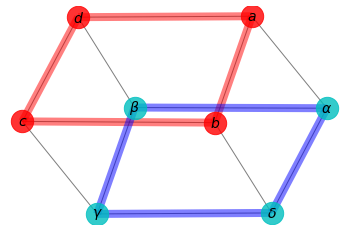

In [38]:
import matplotlib.pyplot as plt
    
import networkx as nx

G=nx.cubical_graph() 
pos=nx.spring_layout(G) # positions for all nodes

# Try some other layout algorithms!
# graphviz variants will only work if you have graphviz installed 
# via link given above.
#pos = nx.circular_layout(G)
#pos = nx.graphviz_layout(G,prog='twopi')
#pos = nx.graphviz_layout(G,prog='sfdp')
#pos = nx.graphviz_layout(G,prog='neato')

# nodes
nx.draw_networkx_nodes(G,pos,
                       nodelist=[0,1,2,3],
                       node_color='r',
                       node_size=500,
		       alpha=0.8)
nx.draw_networkx_nodes(G,pos,
                       nodelist=[4,5,6,7],
                       node_color='c',
                       node_size=500,
		       alpha=0.8)

# edges
nx.draw_networkx_edges(G,pos,width=1.0,alpha=0.5)
nx.draw_networkx_edges(G,pos,
                       edgelist=[(0,1),(1,2),(2,3),(3,0)],
                       width=8,alpha=0.5,edge_color='r')
nx.draw_networkx_edges(G,pos,
                       edgelist=[(4,5),(5,6),(6,7),(7,4)],
                       width=8,alpha=0.5,edge_color='b')


# some math labels
labels={}
labels[0]=r'$a$'
labels[1]=r'$b$'
labels[2]=r'$c$'
labels[3]=r'$d$'
labels[4]=r'$\alpha$'
labels[5]=r'$\beta$'
labels[6]=r'$\gamma$'
labels[7]=r'$\delta$'
nx.draw_networkx_labels(G,pos,labels,font_size=14)

plt.axis('off')
plt.savefig("labels_and_colors.png") # save as png
plt.show() # display

## Customized drawing example

The next cell shows various ways of customizing the karate graph. 
  
In particular, the steps shown are those needed to produce the colored FG layout figure in the lecture notes. Some of the commented out lines show experiments you could try.

In [ ]:
list(zip(clubs, club_colors))

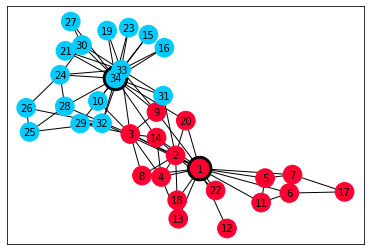

In [ ]:
import math

kn = nx.karate_club_graph()

# Keep both communities the same color for pictures not coloring the communities.
#club_colors = ('red','red') 
#Some alternative color schemes
#club_colors = ('lightgray','salmon')
#club_colors = ('lightblue','salmon')
#club_colors = ('yellow','lightgreen')
club_colors = ('#00CCFF','#FF0033')
clubs = ('Officer', 'Mr. Hi')
# A dictionary that maps from a club to the club color.
color_dict = dict(list(zip(clubs, club_colors)))
# node_dict[n]['club'] is the club for node n.
node_dict = kn.nodes 

# Now using Zachary's data, make a list of colors to be used to color 
# each node based on the faction of that node (according to Zachary)

node_color = [color_dict[node_dict[n]['club']] 
              for n in range(len(kn.nodes()))]

# Draw the network with no labels, itsy-bitsy nodes
#pos = nx.spring_layout(kn,scale=1.0)
pos = nx.spring_layout(kn)
#nx.draw_networkx(kn,pos, with_labels=False,
#                 node_size=25,node_color="lightgray")  #Default node size=300

#default_distance_between_nodes = 1.0/math.sqrt(len(kn.nodes()))
#pos = nx.spring_layout(kn,scale=1.0,k=2*default_distance_between_nodes)
#pos = nx.spring_layout(kn,scale=2.0)

#Now put in the labels, using a label->new_label mapping. We'll change the labels to agree with
# Zachary's original indexing, so x->x+1
new_labels = dict((x,x + 1) for x in kn.nodes())
font_size = 10
## ha/va not working
nx.draw_networkx_labels(kn,pos,new_labels,
                        font_size=font_size,
                        font_color='black',
                        verticalalignment='center',
                        ha = 'center',
                        fontsize = 8)
# Highlight the two leader nodes, by drawing slightly larger black circles round them.
nx.draw_networkx_nodes(kn,pos,{0:0,33:33},
                       font_size=font_size,
                       node_color=['black','black'],node_size=600)
# Now draw all the nodes, including leaders, using faction color scheme.
nx.draw_networkx_nodes(kn,pos,new_labels,
                       node_color=node_color,node_size=350)
# Put in the edges
nx.draw_networkx_edges(kn,pos)
plt.show()

## Watts-Strogatz graphs

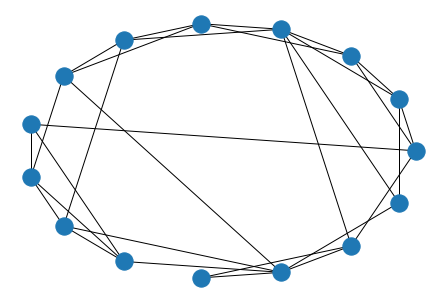

In [ ]:
import networkx as nx
#watts_strogatz_graph(n,k,p,seed)
# k=Number of neighbors each node connects to initially
# p= probability of reconnection. p=0 an ordered graph, p=1 random.
(n,k,p) = (15,4,.15)
g_ran = nx.watts_strogatz_graph(n,k, 1.0, 5)
g_ws = nx.watts_strogatz_graph(n,k, p, 5)
g_ordered = nx.watts_strogatz_graph(15,k, 0, 5)
#g_ordered = nx.newman_watts_strogatz_graph(n,k, 0.0, 5)
#g_ordered = nx.havel_hakimi_graph([4]*25)
nx.draw_circular(g_ws)

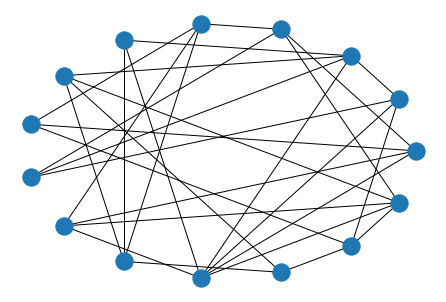

In [ ]:
nx.draw_circular(g_ran)

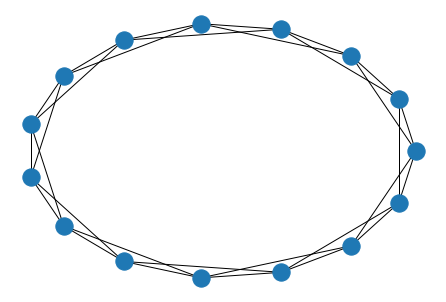

In [ ]:
#g_ordered = nx.watts_strogatz_graph(15,k, 0, 5)
# Need graohviz installed for the following to work
#pos=nx.graphviz_layout(g_ordered,prog='circo')
#nx.draw_networkx(g_ordered,pos=pos)
nx.draw_circular(g_ordered)

## The clustering coefficient of a random graph

`Networkx` provides a clustering function that takes a graph and sequence of nodes in that graph and returns a dictionary each of the given nodes with its clustering coefficient.  The average clustering coefficient of the graph is just the sum of the values of the coefficients for all the nodes divided by the number of nodes.

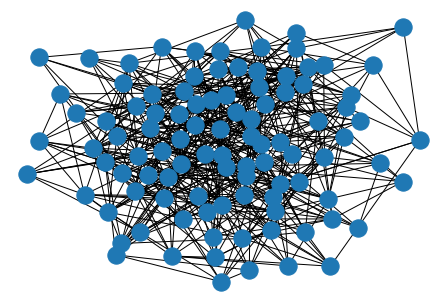

In [39]:
G = nx.erdos_renyi_graph(100,0.11)
nx.draw_spring(G)

In [40]:
G = nx.erdos_renyi_graph(100,0.11)
cl = nx.clustering(G,G.nodes())
sum(cl.values())/len(cl)

0.11264872743355711

In [ ]:
cl

In [41]:
G = nx.erdos_renyi_graph(500,0.11)
cl = nx.clustering(G,G.nodes())
sum(cl.values())/len(cl)

0.11215542849597467

The next cell will take a while.  While it's computing away, you'll have the chance to think
about it. What do you think the clustering coefficient of the graph will be?

In [42]:
G = nx.erdos_renyi_graph(1000,0.11)
cl = nx.clustering(G,G.nodes())
sum(cl.values())/len(cl)

0.10961858840936657

## Homework question

The value of the clustering coefficient is one of the properties that distinguishes random graphs from social networks.  In the next cell compute the clustering coefficent of the karate graph.  Is it higher or lower than that of the random graph?

## Florentine families

The next graph is a famous graph of Florentine families (Padgett and Ansell 1993).

>Padgett, John F., and Christopher K. Ansell. "Robust Action and the Rise of the Medici, 1400-1434." American journal of sociology (1993): 1259-1319.

A link represents marriage between members of the families.



In [43]:
ff = nx.florentine_families_graph()

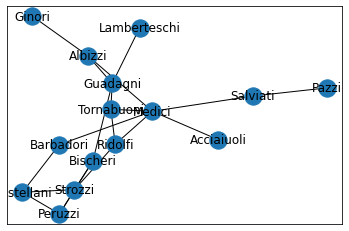

In [44]:
nx.draw_networkx(ff)

## Homework question

Try using the betweenness centrality and degree centrality measures illustrated above for the karate graph.  Which measure does the best job of representing the relative powers of the families?

## Another drawing customization example

In this next example we redraw the Florentine families graph with the node labels raised above the nodes.  Networkx does not seem to offer this capability, so we provide a function for specifying the offsets of the label text from the nodes.  We're not going to discuss how it works, because that involves a lot of details about Matplotlib objects.

Next execute the code in the next two cells to redraw the Florentine family graph, using the new function.

In [198]:
import networkx as nx
#import matplotlib.pylab as plt
import matplotlib.cbook as cb
import math
import math
from matplotlib import pyplot as plt
from matplotlib import rcParams
import cycler

# So far, only 'DejaVu Sans' works
rcParams['font.sans-serif'] = ['Lucida Grande', 'DejaVu Sans',
                               'Verdana']

#n = 4
#color = pyplot.cm.viridis(np.linspace(0, 1,n))
color = ["Cyan", "Gold", "Violet", "Ivory"]
#rcParams['axes.prop_cycle'] = cycler.cycler(color = color)
def annotate_with_networkx_labels(G, pos,
                                  labels=None,
                                  fontname = None,
                                  font_size=12,
                                  font_color='k',
                                  font_weight='normal',
                                  alpha=1.0,
                                  ax=None,
                                  horizontalalignment = 'center',
                                  verticalalignment = 'center',
                                  xoff = 0.0,
                                  yoff = 0.0,
                                  offset_dict = None,
                                  **kwds):
    """Draw node labels on the graph G.

    Parameters
    ----------
    G : graph
       A networkx graph

    pos : dictionary, optional
       A dictionary with nodes as keys and positions as values.
       If not specified a spring layout positioning will be computed.
       See networkx.layout for functions that compute node positions.

    font_size : int
       Font size for text labels (default=12)

    font_color : string
       Font color string (default='k' black)

    font_weight : string
       Font weight (default='normal')

    xoff: int ot float
        Horizontal offset in points of text from node
        
    yoff: int ot float
        Vertical offset in points of text from node
        
   alpha : float
       The text transparency (default=1.0)

    ax : Matplotlib Axes object, optional
       Draw the graph in the specified Matplotlib axes.
    """
    if ax is None:
        ax=plt.gca()

    if labels is None:
        labels=dict( (n,n) for n in G.nodes())

    # A variant for some of the text annotations.
    text_props_r = dict(fontname =fontname,
                        size=font_size,
                        color= font_color,
                        weight = font_weight,
                        verticalalignment = verticalalignment,
                        horizontalalignment = horizontalalignment,
                        alpha = alpha,
                        # Express text coords in offsets from xy, unit is pt
                        textcoords='offset points')

    text_items={}  # there is no text collection so we'll fake one
    offset_dict0 = dict((n,(xoff,yoff)) for n in G)
    if offset_dict:
        offset_dict0.update(offset_dict)
    for n, label in labels.items():
        (x,y)=pos[n]
        label=str(label) # this will cause "1" and 1 to be labeled the same
        thisxoff,thisyoff = offset_dict0[n]
        t=ax.annotate(label,xy=(x, y),
                      xytext=(thisxoff,thisyoff),
                      #transform = ax.transData,
                      clip_on=True,
                      **text_props_r
                      )
        text_items[n]=t

    return text_items


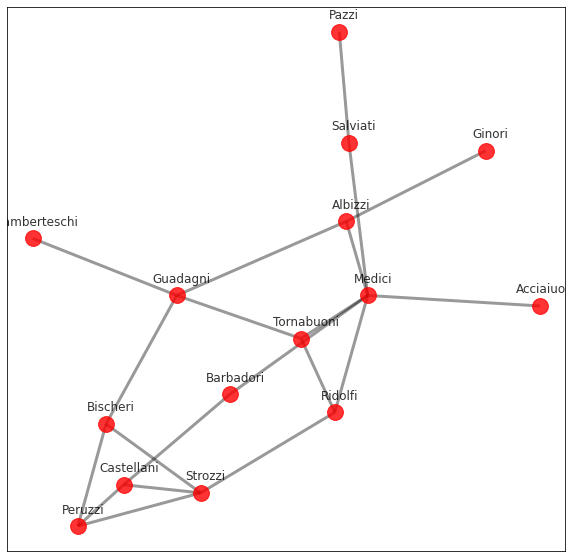

In [205]:
import matplotlib.pylab as plt

import networkx as nx
#from imp import reload
#reload(annotate_networkx)
G = nx.florentine_families_graph()
# Graphviz version only works if you have graphviz installed.
#pos=nx.graphviz_layout(G,prog='sfdp') 
pos=nx.spring_layout(G) 

# Make the figure bigger
plt.figure(figsize=(10,10))
nx.draw_networkx_nodes(G,pos,
                       node_color='r',
                       node_size=250,
                       alpha=0.8)
# edges
nx.draw_networkx_edges(G,pos,width=3.0,alpha=0.4)

yoff = 16
# Raise labels so that the vertical center of the text is yoff above node
text = annotate_with_networkx_labels(G,pos,yoff=yoff, xoff= 5, alpha = .8,
                                     verticalalignment='center')
#plt.show()

In [ ]:
plt.show()

## Political blogs example

This example is mostly another example of 
customizing networkx's graph drawing, this time with a larger network.
We first reading the Adamic/Glance political blogs data.  This is raw data and it presents a problem.  If there are links in both directions between a pair of websites, there are 2 edges between the websites, on e in each direction.  This makes the graph what is called a **directed graph**, and many of our analysis tools don't work on directed graphs.  So what we'll do is turn it into an undirected graph to start with.  We'll do this by removing any multiple edges between a pair of nodes, also ruling out the possibility that there could be two edges in the same direction between a given pair (which would give us a **multigraph**).

In [193]:
url22 = 'http://gawron.sdsu.edu/python_for_ss/course_core/assignments/homer.gml'
hg = url_fetch_networkx_graph (url22)

In [195]:
len(hg)

561

In [155]:
import networkx as nx
import urllib.request

def url_fetch_networkx_graph (url):
    with urllib.request.urlopen(url) as filehandle:
         G = nx.read_gml(filehandle)
    return G

github_networks_data = 'https://raw.githubusercontent.com/gawron/python-for-social-science/master/networks/'
pb_url = os.path.join(github_networks_data, 'polblogs.gml')

pb = url_fetch_networkx_graph (pb_url)
# Specify the code dir in the new filesystem.
#pb = readwrite_gml.read_gml('polblogs.gml')
#pbd = pb.to_directed(as_view=False)
#pb = nx.read_gml('polblogs.gml')
#done = set()

# Get rid of multigraph type edges (site A linking to site B mutiple times)
done = []
for (start,end) in list(pb.edges()):
    if (start, end) in done:
        pb.remove_edge(start,end)
    else:
        done.append((start,end))

In [156]:
pb_ug = pb.to_undirected()
# Get rid of self loops
for (start, end) in list(pb_ug.edges()):
    if start == end:
       pb_ug.remove_edge(start, end)

In [157]:
def get_biggest_component (UG):
    components = list(nx.connected_components(UG))
    components.sort(key=lambda x:len(x),reverse=True)
    return UG.subgraph(components[0])

big_component = get_biggest_component(pb_ug)
# IF YOU DO THIS, try graphviz directly on the dot file
# for a different looking layout: sfdp -Tpng -opolblogs_sfdp.png polblogs.dot
#nx.write_dot(big_component, 'polblogs.dot')
print('G: %d nodes  Largest component: %d nodes' % (len(pb_ug.nodes()), len(big_component.nodes())))

G: 1490 nodes  Largest component: 1222 nodes


The key point here is that this is a big graph (nearly 1500 nodes) and it is not completely connected and it is also a multigraph.  The layout algorithms we want to demo below work with undirected simple graphs with no self-loops, so the `for`-loop includes code to take away multiple edges between node-pairs (what makes a graph a multigraph) and self loops. The `networkx` graph method `to_undirected` makes sure we have an undirected graph.

Here it might also be useful to use the boolean keyword *relabel=True* to use the names given
the blog sites on the *label* attribute.  By default `networkx` throws those away and just
uses the *id* attribute as the node name.  For now we don't do this, since we will dispense with any labels in this graph, because of the extra visualization problems labels create.  We next run the  layout algorithm. 

One option that networkx provides is to contract out the drawing work to another node layout program `graphviz`.  The next command tries to use a graphviz implementation of a force-spring layout algorithm, but that will only work if you have graphviz installed.  If you're using graphviz, this step will take a few minutes, so be patient.

In [158]:
import networkx as nx
pos = nx.spring_layout(big_component)

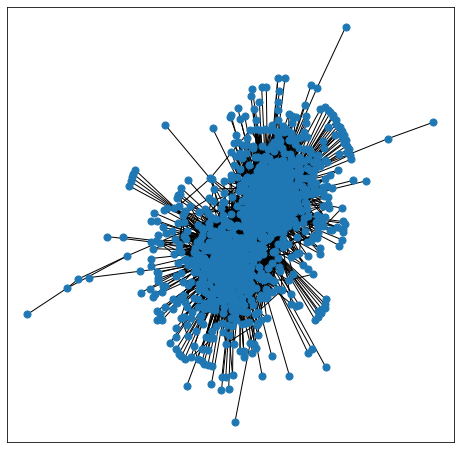

In [159]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8,8))
nx.draw_networkx_nodes(big_component,pos=pos,node_size=50)
nx.draw_networkx_edges(big_component,pos=pos)
plt.show()

This does not look quite as well separated as the graph we saw in lecture, produced by Gephi, and that may or may not due to the fact that the default number of iterations is not quite enough with this many nodes (the more iterations, the further apart the nodes fly).  But the liberal and conservative blogs are in fact already quite well separated, as we can see if we add in some coloring.  The classifications of the blog sites into liberal and conservative are stored in the class attribute `value`. So let's use that information to color. The value `1` stands for conservative (color that red) and the value `0` for liberal (color that blue).

In [160]:
blog_names = list(big_component.nodes)
print(blog_names[0])
big_component.nodes[blog_names[0]]['value']

100monkeystyping.com


0

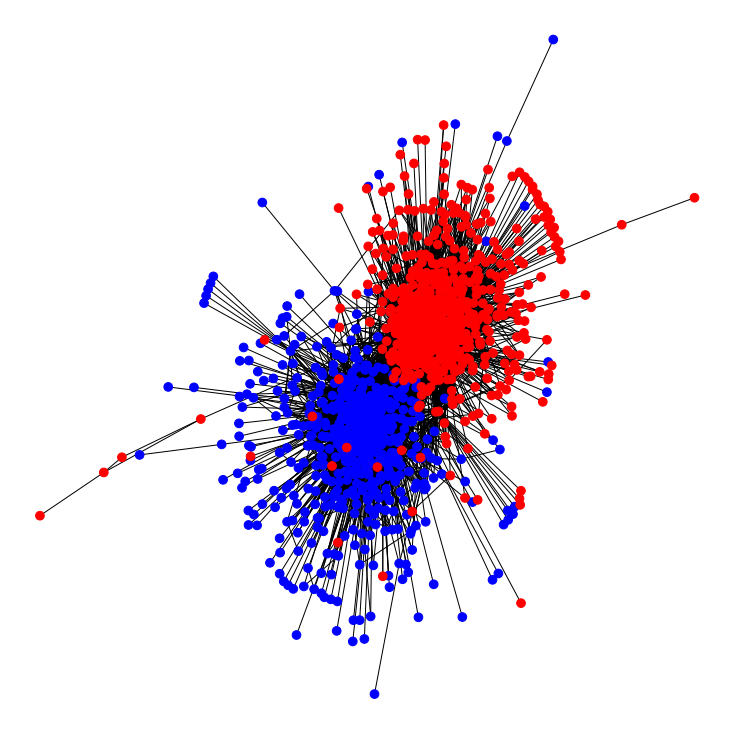

In [161]:
color_seq = ('blue','red')
val_seq = (0,1)
cls_attr = 'value'
# dict that maps values onto colors
color_dict = dict(list(zip(val_seq, color_seq)))
# dict with each node attribute [all networkx graphs have this]
node_dict = big_component.nodes
# List of length n (# nodes) that assigns a color to each node
colorList = [color_dict[node_dict[n][cls_attr]] 
             for n in list(node_dict.keys())]
plt.figure(figsize=(10,10))
nx.draw(big_component,pos,node_size=75,node_color=colorList)
plt.show()
# An equivalent way of doing it.
#nx.draw_networkx_nodes(big_component,pos=pos,node_color=colorList)
#nx.draw_networkx_edges(big_component,pos=pos)

## Les Miserables

First lets read in the graph for the characters in Victor Hugo's novel `Les Miserables`,
and do some simple computations.

In [146]:
import networkx as nx
import urllib.request
import os.path

lm_url = os.path.join(github_networks_data, 'lesmiserables.gml')

#lm = nx.read_gml('lesmiserables.gml')

lm = url_fetch_networkx_graph(lm_url)
M = nx.betweenness_centrality(lm)
il = list(M.items())
il.sort(key=lambda x:x[1],reverse=True)
top_chars = il[:10]

## Centrality

In [ ]:
M = nx.betweenness_centrality(lm)
il = list(M.items())
il.sort(key=lambda x:x[1],reverse=True)
top_chars = il[:10]

In [147]:
top_chars

[('Valjean', 0.5699890527836184),
 ('Myriel', 0.17684210526315788),
 ('Gavroche', 0.16511250242584766),
 ('Marius', 0.132032488621946),
 ('Fantine', 0.12964454098819422),
 ('Thenardier', 0.07490122123424225),
 ('Javert', 0.05433155966478436),
 ('MlleGillenormand', 0.047598927875243675),
 ('Enjolras', 0.0425533568221771),
 ('Tholomyes', 0.04062934817733579)]

## Simple graph attributes and analysis

The `relabel=True` says to use the value of the `label` attribute as the name of the node.  This means each node will have the same name as the character it represents.  If `relabel=False`, the `label` would still be an attribute of each node but each node would have an integer name.  

We have also found the `betweenness` centralities of all the nodes in the graph (line 3)
and created a sorted list of nodes, from highest centrality to lowest, and created a new list `top_chars` with the 10 most central  characters.

In [ ]:
il

The `top_chars` list is interesting and mostly intuitive, except that `Javert`, the policeman who relentlessly tracks `Valjean` and is certainly important, has rather a low betweenness centrality value.  You can look at the graph pictures below and speculate as to why this is.  Readers of the novel might also have some ideas.  It might also point to a problem with `betweeness centrality` as a measure of centrality.

In [19]:
top_chars

[('Valjean', 0.5699890527836184),
 ('Myriel', 0.17684210526315788),
 ('Gavroche', 0.16511250242584766),
 ('Marius', 0.132032488621946),
 ('Fantine', 0.12964454098819422),
 ('Thenardier', 0.07490122123424225),
 ('Javert', 0.05433155966478436),
 ('MlleGillenormand', 0.047598927875243675),
 ('Enjolras', 0.0425533568221771),
 ('Tholomyes', 0.04062934817733579)]

Ths list of characters.

In [20]:
lm.nodes()

NodeView(('Myriel', 'Napoleon', 'MlleBaptistine', 'MmeMagloire', 'CountessDeLo', 'Geborand', 'Champtercier', 'Cravatte', 'Count', 'OldMan', 'Labarre', 'Valjean', 'Marguerite', 'MmeDeR', 'Isabeau', 'Gervais', 'Tholomyes', 'Listolier', 'Fameuil', 'Blacheville', 'Favourite', 'Dahlia', 'Zephine', 'Fantine', 'MmeThenardier', 'Thenardier', 'Cosette', 'Javert', 'Fauchelevent', 'Bamatabois', 'Perpetue', 'Simplice', 'Scaufflaire', 'Woman1', 'Judge', 'Champmathieu', 'Brevet', 'Chenildieu', 'Cochepaille', 'Pontmercy', 'Boulatruelle', 'Eponine', 'Anzelma', 'Woman2', 'MotherInnocent', 'Gribier', 'Jondrette', 'MmeBurgon', 'Gavroche', 'Gillenormand', 'Magnon', 'MlleGillenormand', 'MmePontmercy', 'MlleVaubois', 'LtGillenormand', 'Marius', 'BaronessT', 'Mabeuf', 'Enjolras', 'Combeferre', 'Prouvaire', 'Feuilly', 'Courfeyrac', 'Bahorel', 'Bossuet', 'Joly', 'Grantaire', 'MotherPlutarch', 'Gueulemer', 'Babet', 'Claquesous', 'Montparnasse', 'Toussaint', 'Child1', 'Child2', 'Brujon', 'MmeHucheloup'))

Note that although it is no printed out above, the `NodeView` above also leads to the node attribute dictionary for each character.

In this particular graph, the attributes a node can have include its *id* (a unique identifier integer)  and its *label*, which is the character's name.  

The default way to identify a node would be by its `id` attribute, but we indicated we would use the `label` attribute (character names) when we specified `relabel=True`, when we called `readwrite_gml` to read in the graph.  So the keys in the node dictionary
will `label` values.

In [21]:
lm_node_dict = lm.nodes
lm_node_dict['Javert']

{}

Just as nodes can have attributes, so can edges.  Edges might have attributes like strength (or weight) of connection, color, or type (in a graph whcih represents more than one type of connectedness).  The edge attribute dictionary is found in the `edge` attaribute. In our example that's `lm.edge`:

Note that edges can also have attributes. in our *Les Miserables* graph, there is a value attribute on each edge, which contains a weight reflecting how frequently the characters connected by the edge have appeared together in scenes.

In [22]:
lm['Javert']

AtlasView({'Valjean': {'value': 17}, 'Fantine': {'value': 5}, 'MmeThenardier': {'value': 1}, 'Thenardier': {'value': 5}, 'Cosette': {'value': 1}, 'Fauchelevent': {'value': 1}, 'Bamatabois': {'value': 1}, 'Simplice': {'value': 1}, 'Woman1': {'value': 1}, 'Woman2': {'value': 1}, 'Gavroche': {'value': 1}, 'Enjolras': {'value': 6}, 'Gueulemer': {'value': 1}, 'Babet': {'value': 2}, 'Claquesous': {'value': 1}, 'Montparnasse': {'value': 1}, 'Toussaint': {'value': 1}})

The attributes an edge have include the *value* attribute.  This is an integer that gives the number
of times two characters appear in a scene together.  Thus the higher the value the more intense
or "weighted" the connection between the two characters is.  We will experiment with
using this attribute in drawing graphs below.

We'll make one dictionary that has edges as keys (represented as pairs of strings) and their weights as values.  We'll use that to sort character relationships by strength:

In [6]:
(f,fdict) = list(lm.edges.items())[0]

In [11]:
f

('Myriel', 'Napoleon')

In [10]:
list(fdict.items())[0]
fdict

{'value': 1}

In [166]:
def sort_edges_by_weight (G,weight_att='value'):
    # frozenset used because ('Cosette', 'Valjean') is the same relationship as ('Valjean','Cosette'). 
    edge_dict = dict((frozenset(pair), fdict['value']) for (pair,fdict) in G.edges.items())
    return sorted(list(edge_dict.items()),key=lambda x: x[1], reverse=True)

edge_dict_il = sort_edges_by_weight(lm)
edge_dict_il[:5]

[(frozenset({'Cosette', 'Valjean'}), 31),
 (frozenset({'Cosette', 'Marius'}), 21),
 (frozenset({'Marius', 'Valjean'}), 19),
 (frozenset({'Javert', 'Valjean'}), 17),
 (frozenset({'Courfeyrac', 'Enjolras'}), 17)]

## Drawing issues

Next we try to draw the `Les Mis` graph, using the tools we used before.

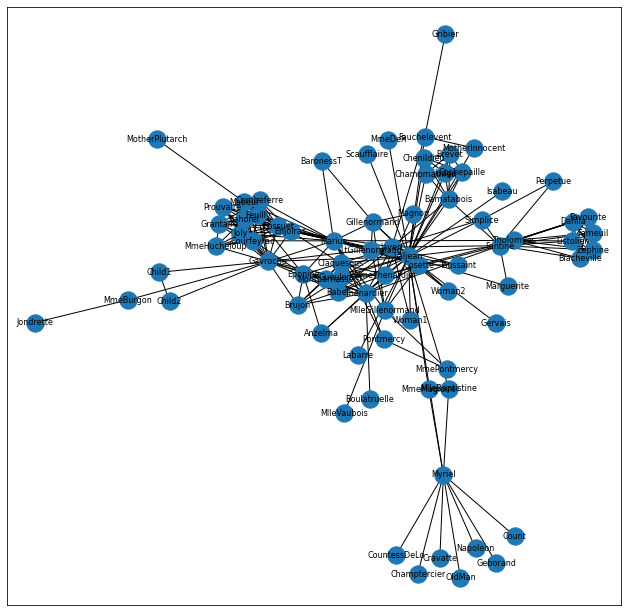

In [13]:
#pos = nx.spring_layout(lm,scale=1.0,iterations=200)
import math
from matplotlib import pyplot as plt
plt.figure(figsize=(11,11))
default_distance_between_nodes = 1.0/(math.sqrt(len(lm.nodes())))
#pos = nx.spring_layout(lm,scale=1.0,k=5*default_distance_between_nodes) # Try adjusting default distance between nodes
pos = nx.spring_layout(lm)
# Default node size=300, default font_size=12
# nx.draw_networkx(lm,pos, node_size=300, font_size=12)  
# node_size=800,font_size=8
# Try experimenting with node_shape 'D'
nx.draw_networkx(lm,pos, node_size=300, font_size=8)

This graph isnt very pretty to look at.  We're going to try to draw something
better.

We're only going to label subset of the nodes in the final graph (the top characters).  To do
that, we're going to create a dictionary of the nodes we're interested in.  It's going
to map nodes to the labels we want to use.  But the nodes are already represented by the labels
we're interested in, because we read them in with *relabel=True*.  So our new_labels dictionary
is just going to map a node to itself.

In [14]:
new_labels = dict((k,k) for (k,v) in top_chars)
num_nodes = len(lm.nodes())
import math
default_distance_between_nodes = 1.0/(math.sqrt(num_nodes))

In [15]:
new_labels

{'Enjolras': 'Enjolras',
 'Fantine': 'Fantine',
 'Gavroche': 'Gavroche',
 'Javert': 'Javert',
 'Marius': 'Marius',
 'MlleGillenormand': 'MlleGillenormand',
 'Myriel': 'Myriel',
 'Thenardier': 'Thenardier',
 'Tholomyes': 'Tholomyes',
 'Valjean': 'Valjean'}

# Using color cycles

When the number of colors is unknown in advance, as when running a community discovery algorithm, color cycles are helpful.  



In [98]:
from cycler import cycler
# You could simultaneously cycle through color and line style
color_cycle = cycler(color=['r', 'g', 'b'],style=['plain','dashed','dotted'])
# Is a container
Ncolors = len(color_cycle)
print('Num colors',Ncolors)
for v in color_cycle:
  print(v)

Num colors 3
{'color': 'r', 'style': 'plain'}
{'color': 'g', 'style': 'dashed'}
{'color': 'b', 'style': 'dotted'}


In [99]:
from cycler import cycler
color_cycle = cycler(color=['r', 'g', 'b'])
Ncolors = len(color_cycle)
# Turn it into an infinite iterator
cc = color_cycle()
# Show the cycler cycling
for (i,c) in zip(range(12),cc):
     if i%Ncolors == 0:
       print('='*14)
     print(c)

{'color': 'r'}
{'color': 'g'}
{'color': 'b'}
{'color': 'r'}
{'color': 'g'}
{'color': 'b'}
{'color': 'r'}
{'color': 'g'}
{'color': 'b'}
{'color': 'r'}
{'color': 'g'}
{'color': 'b'}


Num colors 20
{'color': (0.19215686274509805, 0.5098039215686274, 0.7411764705882353)}
{'color': (0.4196078431372549, 0.6823529411764706, 0.8392156862745098)}
{'color': (0.6196078431372549, 0.792156862745098, 0.8823529411764706)}


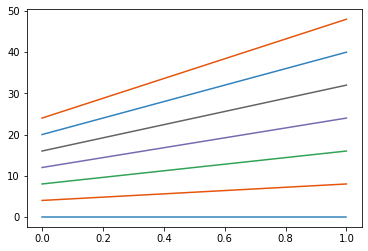

In [101]:
Z = plt.cycler("color", plt.cm.tab20c.colors)
# When plotting cycle through this sequence
rcParams["axes.prop_cycle"] = Z
zz = Z()
# How many colors willI cycle through?
print('Num colors', len(Z))
for (i,c) in zip(range(3),zz):
     print(c)
fig, ax = plt.subplots()
# Plot a line for every 4th color in cycle, go partway intio 2nd cycle
for i in range(25):
    if i%4 ==0:
      ax.plot([0,1], [i, 2*i])
    else:
      ax.plot([0],[0])

#plt.show()

## Drawing and **annotation** code

In [144]:
def new_draw_nodes(g,fileName=None, cls_attr='Community', ax = None,
                   prog = 'neato', pos = None, color_seq = None,
                   val_seq = None,with_labels=False,show=False, title=None,
                   use_graphviz=False):
        """
        Draws graph uses nx drawing tools, which call matplotlib (pyplot) as plt.

        Use color_seq to specify colors used to represent membership in set
        of nodes bearing attribute C{cls_attr}.  By default this is C{Community},
        but it can be any node attribute  represented in C{node_dict}.

        Pass in C{color_seq} to use a particular set of node colors.
        Optionally use val_seq in conjunction to map particular colors to particular values.

        Can optionally pass in a previously computed node layout as C{pos}.  Useful
        for comparing versions of graph colored according to different
        attributes.
        """
        ## Get the range of the attribute function.
        #node_dict = dict(g.nodes(data=True))
        node_dict = g.nodes
        val_set = set([node_dict[n][cls_attr] for n in g.nodes()])
        if color_seq is None:
            # Use integers and default color map
            color_seq = list(range(len(val_set)))
        ## Assign a color index to each member of val_set
        if val_seq is None:
            val_seq = val_set
        else:
            assert(val_set.issubset(val_seq)), 'Data vals include values not in val_seq'
        color_dict = dict((v,color_seq[i]) for (i,v) in enumerate(val_seq))
        colorList = [color_dict[node_dict[n][cls_attr]] for n in g.nodes()]
        plt.figure(figsize=(8,8))
        if title:
            plt.title(title)
        if pos is None and use_graphviz:
            pos = nx.graphviz_layout(g,prog=prog)
            # The next two lines seem to be out of date, since they raise a "Requires pygraphviz" error
            #Gprime = nx.to_agraph(g)
            #Gprime.layout(prog=prog)
        elif pos is None:
            pos = nx.spring_layout(g)
        nx.draw(g,pos,ax = ax, node_color=colorList,with_labels=with_labels)
        if fileName is not None:
            plt.savefig(fileName)
        if show:
            plt.show()
        return color_dict, pos

def assign_colors(G, color_att, color_seq=None, val_seq=None, integers_ok=True):
   val_set = set([G.nodes[n][color_att] for n in G.nodes()])
   if color_seq is None and integers_ok:
         # Use integers and default color map
         color_seq = list(range(len(val_set)))
   elif color_seq is None:
         color_seq = ('gold','cyan','dimgray','coral','burlywood','ivory','red', 'k')
   if val_seq is None:
      val_seq = val_set
   else:
       assert(val_set.issubset(val_seq)), 'Data vals include values not in val_seq'
   return dict(list(zip(val_seq, color_seq)))
   
def draw_color_graph (G, color_att, pos=None, labels=None,
                      offset_dict=None, yoff=8, plt_file=None,
                      node_size=220, node_alpha=.9, label_alpha=.8, edge_alpha = .3,
                      node_color = None, color_seq=None, val_seq=None, label=True,
                               ):
   """
   More contorl than new_draw_nodes.  No axis arg 
   node_color can be a be a color string spec; if it is, all nodes get that color.
   """
   node_dict  = G.nodes
   if node_color is None:
      color_dict = assign_colors(G, color_att, color_seq,val_seq)
      # List of length n (# nodes) that assigns a color to each node
      colorList = [color_dict[node_dict[n][color_att]] for n in G.nodes()]
   else:
      ColorList = node_color
   plt.figure(figsize=(11,11))
   if pos is None:
       pos = nx.spring_layout(G,scale=1.0)
   nx.draw_networkx_nodes(G,pos,
                          node_color=colorList,
                          node_size=node_size,
                          alpha=node_alpha)
   nx.draw_networkx_edges(G,pos,width=.8,alpha=edge_alpha)
   if label:
     annotate_with_networkx_labels(G,pos,labels=labels,yoff=yoff, alpha = label_alpha,
                                    verticalalignment='bottom', offset_dict = offset_dict) 
   if plt_file:
      plt.savefig(plt_file)

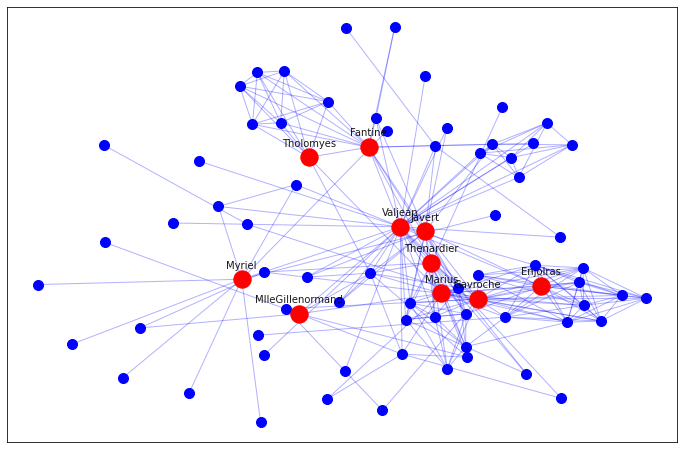

In [31]:

plt.figure(figsize=(12,8))
#pos = nx.spring_layout(lm,scale=1.0) # The default scale is 1.0
default_distance_between_nodes = 1.0/(math.sqrt(len(lm.nodes())))
pos = nx.spring_layout(lm,scale=1.0,k=5*default_distance_between_nodes)
#pos = nx.spring_layout(lm,scale=1.0,k=2*default_distance_between_nodes) # Try adjusting default distance between nodes
#pos = nx.spring_layout(lm,scale=.75) # Try tweaking the scale and adjusting node positions.
#pos = nx.spring_layout(lm,scale=1.0,weight='value') # Try increasing spring tension for chars with more scenes together
#pos = nx.spring_layout(lm,scale=1.0,weight='value') # Try increasing spring tension for chars with more scenes together
nx.draw_networkx_edges(lm,pos, edge_color='blue',alpha=.3)  #Default node size=300
nx.draw_networkx_nodes(lm,pos,node_color='blue',node_size=100)
nx.draw_networkx_nodes(lm,pos,new_labels,node_color='red',node_size=300)
#l = nx.draw_networkx_labels(lm,pos,new_labels,font_size=10,font_color='black')
# Raise labels so that bottom is 7pt above node
text = annotate_with_networkx_labels(lm,pos,labels=new_labels,yoff=9, alpha = .9,
                                     font_size=10,verticalalignment='bottom')

First we draw the graph with no labels and small nodes.  Then in line 7 we add labels **only** for the top characters.  Then
in line 8 we resize the top character nodes and make them red.  This sequence of code is a very useful model.  When you want to
do something special to a subset of the nodes, draw the background graph first, choosing parameters to make the background
nodes less visually salient.  Then tweak/create the labels with *networkx_draw_labels* for that subset of the nodes you want to foreground
(using a dictionary like *new_labels* that maps from nodes to their new labels).  Some foregrounding operations (such as tweaking node size)
require you to redraw a subset of the nodes using *draw_networkx_nodes*.
To just draw edge labels instead of node labels, you would use *draw_networkx_edge_labels*.  The dictionary now needs to contains edges as keys, and edges are referred to by using the pair of nodes they connect.

## Hand labeling

The next version of the `Les Mis` graph is the one that takes the most work.  All labels are drawn, and their positioning with respect to the node is specified on a node-by-node basis.  This will produce the best-looking result that loses no information, and for some purposes (important reference diagram in a paper) is worth the work.

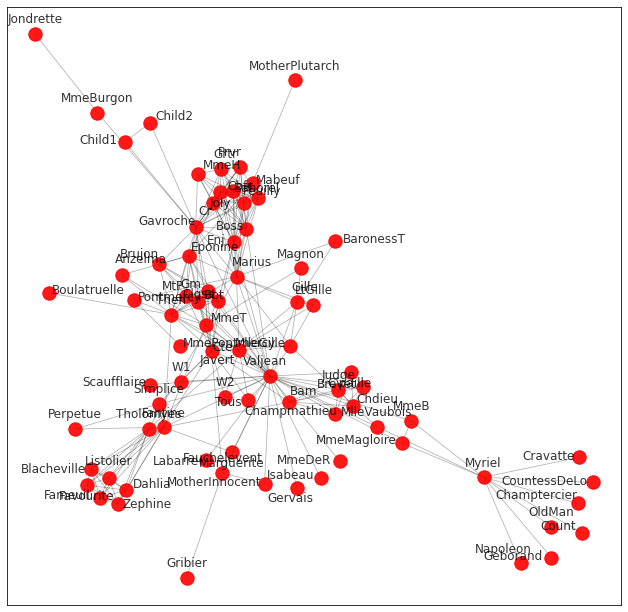

In [132]:
plt.figure(figsize=(11,11))
#lm = lm.to_undirected()
#default_distance_between_nodes = 1.0/(math.sqrt(len(lm.nodes())))
#pos = nx.spring_layout(lm,scale=1.0,k=6*default_distance_between_nodes) # Try adjusting default distance between nodes
pos = nx.spring_layout(lm)
# Default node size=300, default font_size=12
nx.draw_networkx_nodes(lm,pos,
                       node_color='r',
                       node_size=180,
                       alpha=0.9)
# edges
nx.draw_networkx_edges(lm,pos,width=.8,alpha=0.3)

# Offset units are pts (1/72in), so pretty small.
offset_dict = dict(Napoleon = (-17,8),
                   Geborand = (-38,-5),
                   Champtercier = (-42,2),
                   Count = (-24,0),
                   CountessDeLo = (-49,-5),
                   Cravatte = (-30,-5),
                   Child1 = (-27,-5),
                   Child2 = (24,0),
                   Scaufflaire = (-36,-4),
                   MotherInnocent = (-50,-5),
                   Blacheville = (-37,-7),
                   Bamatabois  = (14,4),
                   Fameuil = (-33,-4),
                   Zephine = (29,-7),
                   Favourite = (0,-17),
                   Marguerite = (0,-17),
                   Gervais = (-7,-17),
                   MmeDeR = (-36,-5),
                   Listolier = (0,10),
                   Dahlia = (26,0),
                   MmeMagloire =(-45,-4),
                   Champmathieu = (-45,-4),
                   Labarre = (-30,-7),
                   Isabeau = (-30,-4),
                   Judge = (0,8),
                   Cochepaille = (-1,-17),
                   Brevet = (-26,-4),
                   #Chenildieu = (14,8),
                   Chenildieu = (24,0),
                   Pontmercy = (36,-4),
                   MmePontmercy = (49,-4),
                   Boulatruelle = (39,-4),
                   BaronessT = (39,-4),
                   Woman1 = (0,8),
                   Woman2 = (0,8),
                   Anzelma = (19,9),
                   Gillenormand = (8,8),
                   LtGillenormand = (0,8),
                   MlleGillenormand = (-30,-4),
                   Simplice = (0,8),
                   Valjean = (-5,8),
                   Javert = (6,-16),
                   Toussaint = (-20,-9),
                   Marius = (15,8),
                   Cosette = (-16,-4),
                   MmeThenardier = (23,0),
                   Claquesous = (-20,0),
                   Gueulemer  = (-17,0),
                   Montparnasse = (-13,3),
                   Babet = (16,0),
                   Eponine = (26,2),
                   Brujon = (-20,4),
                   MmeHucheloup = (24,2),
                   Enjolras  = (-18,-4),
                   Bossuet = (-16,-4),
                   Gavroche = (-29,0),
                   Joly = (0,-18),
                   Mabeuf = (26,-4),
                   Combeferre = (-18,5),
                   Bahorel = (24,-4),
                   Feuilly = (18,5),
                   Prouvaire = (-10,8),
                   Grantaire = (4,8),
                   Courfeyrac = (-8,-14)
                  )
## To further help fit labels into the layout, we abbreviate some of them.
labels = dict((n,n) for n in lm.nodes())
labels['Bamatabois'] = 'Bam'
labels['Chenildieu'] = 'Chdieu'
labels['LtGillenormand'] = 'LtGille'
labels['MlleGillenormand'] = 'MlleGille'
labels['Gillenormand'] = 'Gille'
labels['Woman1'] = 'W1'
labels['Woman2'] = 'W2'
labels['Montparnasse'] = 'MtP'
labels['Cochepaille'] = "C'paille"
labels['MmeThenardier'] = 'MmeT'
labels['Thenardier'] = 'Then'
labels['Toussaint'] = 'Tous'
labels['Cosette'] = "Cte"
labels['Claquesous'] = "Clqss"
labels['MlleBaptistine'] = 'MmeB'
labels['Gueulemer'] = 'Gm'
labels['Babet'] = 'Bbt'
labels['MmeHucheloup'] = 'MmeH'
labels['Enjolras'] = 'Enj'
labels['Bossuet'] = 'Boss'
labels['Courfeyrac'] = 'Cr'
labels['Combeferre'] = 'Cbfr'
labels['Prouvaire'] = 'Prvr'
labels['Grantaire'] = 'Grtr'
# Raise labels so that bottom is 8 pt above node
text = annotate_with_networkx_labels(lm, pos, labels=labels, yoff=8, alpha = .8,
                                     verticalalignment='bottom',
                                     offset_dict = offset_dict)

## Adding Communities

In this section we look at community discovery algorithms and how to draw their results.  Let's first use
the karate club example:

In [35]:
import networkx as nx
from networkx.algorithms.community import modularity_max
kn = nx.karate_club_graph()
#kn.remove_nodes_from([32,33])
node_dict = kn.nodes
# Adding community coloring to the above graph.
#from community_jolleycraig import detect_communities,split_communities,new_draw_nodes

We run the algorithm to produce only TWO communities (by using split_communities).  The code adds a community attribute to each node, telling us which of the two community it's in.

In [187]:
#X = modularity_max(kn)
# Also try am2'naive_greedy_modularity_communities'
partitions = modularity_max.greedy_modularity_communities(kn)
partition_dict = dict((n,i) for (i,p) in enumerate(partitions) for n in p)

In [45]:
# The "0" community
partitions[0]

frozenset({8, 14, 15, 18, 20, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33})

In [ ]:
partitions[0]

[8, 14, 15, 18, 20, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33]

We look at the results below, establishing that for the most part, community 1 is club Mr. Hi, and community 0 is club Officer.  

Next we add a new attribute `purity` recording whenever a node in community 0 or 1 does not belong to its default club by assigning that node the `purity` value 2. Otherwise the `purity` value is the same as community value.

In [188]:
from collections import Counter
default = {}
for (i,partition) in enumerate(partitions):
    ctr = Counter([kn.nodes[n]['club'] for n in partition])
    default[i] = ctr.most_common(1)[0][0]
default

{0: 'Officer', 1: 'Mr. Hi', 2: 'Mr. Hi'}

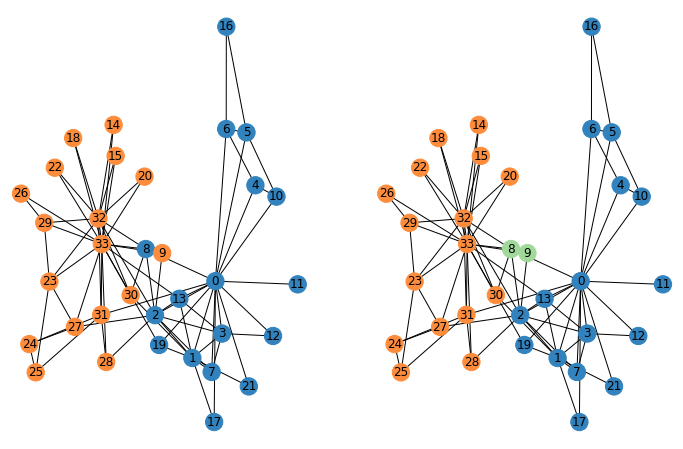

<Figure size 576x576 with 0 Axes>

<Figure size 576x576 with 0 Axes>

In [192]:
from collections import Counter
# We create a dictionary assigning a default club to every community
default = {}
for (i,partition) in enumerate(partitions):
    ctr = Counter([kn.nodes[n]['club'] for n in partition])
    default[i] = ctr.most_common(1)[0][0]
# with 3 communities default looks like this
# {0: 'Officer', 1: 'Mr. Hi', 2: 'Mr. Hi'}
# Well associate eac partition with the club of the plurality
# of its participants
for n in kn.nodes():
    com,club = partition_dict[n], kn.nodes[n]['club']
    kn.nodes[n]['Community'] = com
    kn.nodes[n]['Purity'] = club if club == default[com] else 'misclassified'
    #if kn.nodes[n]['club'] != default[com]:
    #    # We mark misclassified nodes with class 2
    #    kn.nodes[n]['Purity'] = misclassified_nodes_community
    #else:
    #    kn.nodes[n]['Purity'] = com
# A sane choice of 20 colors
color_cyc = plt.cycler("color", plt.cm.tab20c.colors)
closed_color_cyc = color_cyc()
#color_seq = ['Cyan', 'Gold','Ivory']
# Pick colors that are far apart
color_seq = [c['color'] for (i,c) in zip(range(len(color_cyc)),closed_color_cyc) if i%5 == 0]

################# Plotting Code ###########################
# ASk for  two sidebyside subplots, _f is the figure, which we wont use
_f, (ax1, ax2) = plt.subplots(1, 2, sharey=True,figsize=(12,8))
#fn1,fn2 = "karate_club.png","karate_club_purity.png"
fn1,fn2 = None, None
# Draw the graph, coloring according to club membership
kclub_color_dict, kpos = new_draw_nodes(kn,fn1, ax=ax1, cls_attr = 'club', 
                                        color_seq=color_seq, 
                                        with_labels = True)
# Reusing first layout for second pic, which colors misclassified nodes a 3rd color
kclub_color_dict1, kpos1 = new_draw_nodes(kn,fn2, ax=ax2,cls_attr = 'Purity', 
                                         pos = kpos, color_seq=color_seq, 
                                          with_labels = True)

The club colors for Mr. Hi and the Officer club are shown on the right.  A third color is used for those nodes that have been misclassified by the community discovery algorithm.

We see that nodes 8 and 9 have been 'misclassified'.

==============================================================================================

In the next example, we look for communities in the `Les Mis` graph using a community detection algorithm.  To make that convenient we'll define `draw_color_graphviz_graph`, a function which basically combines many of the features we've illustrated above and allows color specifications to be passed in, much as we did in the Polblogs example.  We define it as an example to illustrate one way of pulling together the strategies we have described above.

The `draw_color_graph` function is for networkx graphic visualizations of graphs with a coloring attribute, which can either be assigned by some class attribute in the data or by an attribute assigned by a community detection program.  We allow label positions to be fine-tuned with an offset dictionary by calling the function `annotate_with_networkx_labels` discussed above, and we can pass in the layout and node positions defined above when we use the functions. Notice that it uses the same function `assign_colors` used for coloring the polblog graph.

In the next cell we add information to graph, assigning a community to each node using Mark Newman's greedy community detection algorithm. 

In [138]:
#import community
from networkx.algorithms.community import modularity_max
#from annotate_networkx import annotate_with_networkx_labels
#import readwrite_gml
#lm = readwrite_gml.read_gml('lesmiserables.gml',relabel=True)
lm = url_fetch_networkx_graph(lm_url)
#partitions = modularity_max.greedy_modularity_communities(lm.to_undirected())
partitions = modularity_max.greedy_modularity_communities(lm)
partition_dict = dict((n,i) for (i,p) in enumerate(partitions) for n in p)
for n in lm.nodes():
    lm.nodes[n]['Community'] = partition_dict[n]

In [142]:
# Getting a longer color from our color_cycles
color_seq = [c['color'] for (i,c) in zip(range(len(color_cyc)),closed_color_cyc) if i%4 == 0]

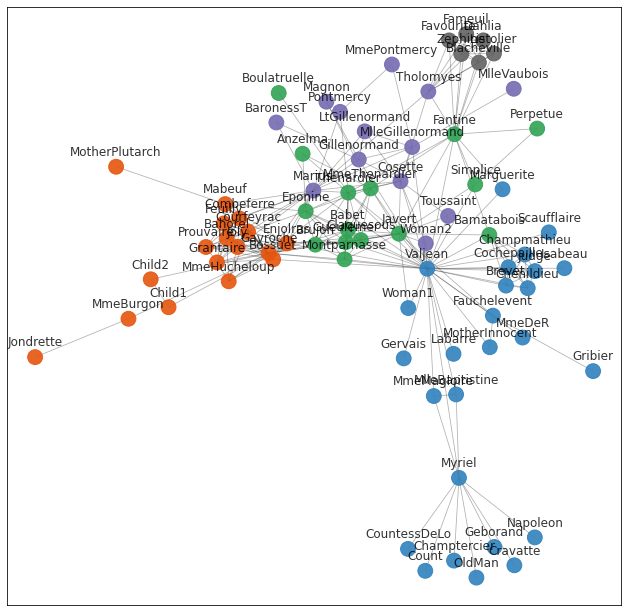

In [143]:
labels = dict((n,n) for n in lm.nodes())
draw_color_graph (lm, 'Community', labels=labels,color_seq=color_seq)

Since each community assignment is stored in the node attribute `Community`, we can see how many communities were found by collecting the community value for each node, and looking at the **set** of communities found.

In [ ]:
coms = set(lm.nodes[n]['Community'] for n in lm.nodes())
coms

{0, 1, 2, 3, 4}

## Anna Karenina (homework assignment)

Read in the graph for *Anna Karenina* (AK).  Follow the
model used in analyzing *Les Miserables* above.  As part of the assignment, you will have to draw
a graph for AK that labels only the top 10 most
central characters, colors the nodes differently, and makes
the nodes a different size.  Use the model of *Les Miserables* (above) to help.


In [149]:
import networkx as nx
#import readwrite_gml
ak_url = os.path.join(github_networks_data, 'anna.gml')
ak = url_fetch_networkx_graph(ak_url)
#ak = readwrite_gml.read_gml('anna.gml',relabel=True)

Graphs read in by `read_gml` have an extra layer of indirection for both
node and edge attributes. Each edge/node stores its ode attributes under
the key `attr_dict`.

In [150]:
list(ak.edges.items())

[(('AA', 'PX'), {'value': 0.5}),
 (('AA', 'DO'), {'value': 0.5}),
 (('AA', 'VR'), {'value': 0.5}),
 (('AA', 'AN'), {'value': 6.5}),
 (('AG', 'BD'), {'value': 1.0}),
 (('AG', 'NI'), {'value': 0.5}),
 (('AG', 'LE'), {'value': 7.58}),
 (('AG', 'MQ'), {'value': 0.33}),
 (('AG', 'VK'), {'value': 0.17}),
 (('AG', 'PS'), {'value': 0.42}),
 (('AG', 'KI'), {'value': 3.25}),
 (('AG', 'ST'), {'value': 0.83}),
 (('AG', 'DO'), {'value': 0.42}),
 (('AG', 'KZ'), {'value': 0.83}),
 (('AG', 'KO'), {'value': 0.67}),
 (('AL', 'SL'), {'value': 2.5}),
 (('AL', 'MA'), {'value': 0.1}),
 (('AL', 'LI'), {'value': 4.17}),
 (('AL', 'MY'), {'value': 0.25}),
 (('AL', 'BT'), {'value': 2.58}),
 (('AL', 'KO'), {'value': 0.52}),
 (('AL', 'ST'), {'value': 7.18}),
 (('AL', 'TV'), {'value': 0.52}),
 (('AL', 'JL'), {'value': 0.67}),
 (('AL', 'PR'), {'value': 0.27}),
 (('AL', 'AN'), {'value': 13.33}),
 (('AL', 'PE'), {'value': 0.52}),
 (('AL', 'LE'), {'value': 0.1}),
 (('AL', 'EF'), {'value': 0.25}),
 (('AL', 'BA'), {'valu

We can sort edges by importance (its **weight** or **value**) as follows.

In [167]:
edge_dict_il = sort_edges_by_weight (ak, weight_att='value')
edge_dict_il[:5]

[(frozenset({'AN', 'VR'}), 27.2),
 (frozenset({'KI', 'LE'}), 22.53),
 (frozenset({'LE', 'ST'}), 17.72),
 (frozenset({'KO', 'LE'}), 14.25),
 (frozenset({'AL', 'AN'}), 13.33)]

For those trying to answer questions about the relationship of the graph to the plot, it will
help to have the full spellout of what the two-character node names mean.  Here is how to
look at that.

In [169]:
desc_dict = ak.nodes
for ch in sorted(ak.nodes())[:20]:
    print('%5s %s' % (ch, desc_dict[ch]['desc']))

   AA Annushka, maid of AN
   AG Agafea Mihalovna, housekeeper of LE
   AL Alexey Alexandrovitch Karenin, minister of state
   AN Anna Arkadyevna Karenina, wife of AL
   AO Aliosha, son of DO and ST
   AP Anna Pavlovna, wife of PV
   BA Annie, baby of AN and VR
   BD Dmitri (Mitya), baby of LE and KI
   BE Madame Berthe, blind woman
   BL Count Bol, friend of KI in Moscow
   BN Bartnyansky, rich man in Petersburg
   BO Countess Bola, wife of BL
   BT Princess Betsy Tverskaya, cousin of VR
   CA Count Anitchkin, supervisor of ST
   CB Countess Bonina, dance partner of YK
   CD Colonel Demin, colleague of VR
   CN Countess Nordston, friend of KI
   CO Cord, English horse trainer
   CV Countess Vronskaya, mother of VR
   DO Princess Darya Alexandrovna Oblonskaya (Dolly), wife of ST


It will also be helpful to know how to get the attributes of any character.

In [170]:
ak_network_node_dict = ak.nodes
ak_network_node_dict['AA']

{'desc': 'Annushka, maid of AN'}

## Coloring paths and graph isomorphism

Exexuting the code below builds a random graph. Then it colors the shortest path between
two nodes.  Read the comments carefully.  If you don't like the graph you're getting or the picture you're getting, try just re-executing the cell.  The results will be different because each time you execute
`nx.erdos_renyi_graph` you get a different random graph matching the specs you passed in
as arguments.  So if it says:

```
G = nx.erdos_renyi_graph(8,0.4)
```

You get a a graph with 8 nodes with a probaility of .4 of having an adge between
any two randomly selected nodes.

To stick with a graph you like, you might also remove the comment `character` `#` from the `random.seed` line
and try different integer values for the argument (1,9 ,7).  Once you get a graph
you like stick with that seed value.  After that, 
you will get the same graph each time you execute the cell, although the details of the layout might differ
each time you execute it.

[0, 5, 13, 10, 3]


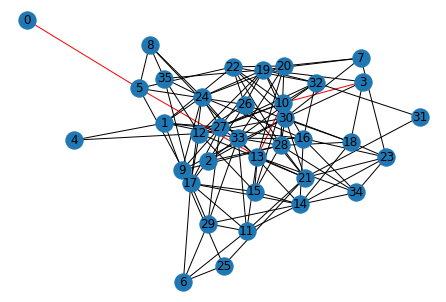

In [180]:
import numpy.random
# numpy.random.seed(5)
# To go back to 
numpy.random.seed()
G = nx.erdos_renyi_graph(36,0.2)
# Find the shortest path from node 0 to node 3
p = nx.shortest_path(G,0,3)
print(p)
# Color all edges black for contrast with what's coming
for e in G.edges():
    G[e[0]][e[1]]['color'] = 'black'
# color edges in the shortest path from 0 to 3 blue
# p is a list of the nodes in the path.
# We're going to color each edge consisting of node in p
# and the next node in p blue, but we want to stop one
# node short of the end, because the last node in the
# path has no next node.  So we iterate through the
# list up to but not including the last member by
# `xrange` 
for i in range(len(p)-1):
    G[p[i]][p[i+1]]['color'] = 'red'
# Store in a list to use for drawing
edge_color_list = [ G[e[0]][e[1]]['color'] for e in G.edges() ]
#  We pass nx.drawa list of colors exactly as long as the list of edges,
#  with the colors in exactly the order we want.  That is
# edge_color_list[i] has the color we want to assign to G.edges()[i].
nx.draw(G,edge_color = edge_color_list, with_labels = True)
#plt.show()

Set the random seed in the next cell to what it was in the previous cell and execute it.
Note that although the length of the shortest paths between 0 and 3 varies when
we look at all random graphs of size 8 with edge probability .4, it does not vary now.  Study the resulting graph to
make sure it is the same as it was in the previous cell, differing only in layout and edge
coloring.

Point:  What makes two graphs identical is that they have the same nodes and each
node has the same neighbors.  Any given graph has an infinite number of colorings and layouts
but it's still the same graph.

In [ ]:
numpy.random.seed(5)
# To go back to 
#random.seed()
G = nx.erdos_renyi_graph(8,0.4)
nx.draw(G, with_labels = True)

A more mathematical issue is that two graphs can be **isomorphic**.  They might have exactly the same structure
but have different names for the nodes.  To start with, note that `G.nodes()` produces a list of the nodes in ascending order.

In [181]:
G.nodes()

NodeView((0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35))

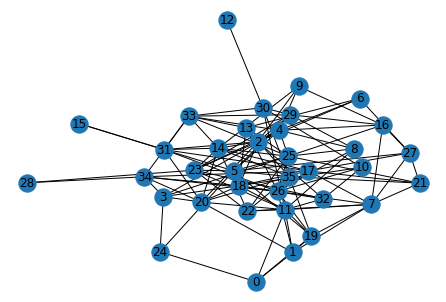

In [182]:
r = numpy.random.permutation(G.nodes())
new_graph = nx.Graph()
# Build a graph modeled on G, renaming the edges according to `r`.
for (s,e) in G.edges():
    new_graph.add_edge(r[s],r[e])
nx.draw(new_graph, with_labels=True)

The graph drawn above is isomorphic to the one we started with.  It has the same number of nodes of degree 4, degree 3, degree 2, etc.  Moreover, there is a particular relabeling of the first graph that produced the second.  We called
that relabeling `r` and write `r[i]` for the new label assigned to node `i`.  Then it will be true that

```
set(new_graph.neighbors(r[i])) == set([r[j] for j in G.neighbors(i)])
```

You should look at what kind of Python object `r` is and think about how it works as a relabeling.

In [183]:
set(new_graph.neighbors(r[i])) == set([r[j] for j in G.neighbors(i)])

True

Note that another way to draw the same new graph is to draw `G` using `r` to give each node a new label, which is what is done below.

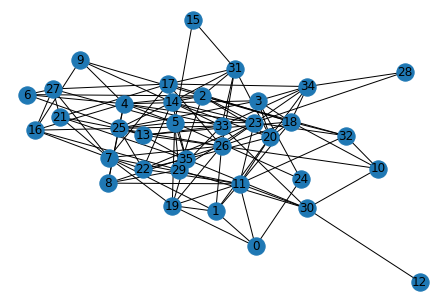

In [184]:
new_labels = dict(list(zip(G.nodes(),r)))
nx.draw(G, labels=new_labels)